In [145]:
import sys  
sys.path.insert(0, './gore')
import importlib
import gore
import gore2
import cv2
import matplotlib.pyplot as plt
importlib.reload(gore2)

<module 'gore2' from './gore/gore2.py'>

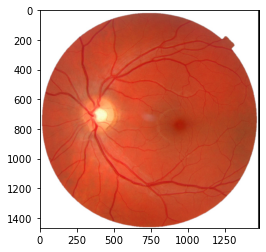

In [146]:
im = gore2.image_from_path('./img/img1.jpg')
fundus2, lammax, phimax = gore2.equi(im = im, focal_length = 24, alpha_max = gore.deg2rad(32))
plt.imshow(fundus2)

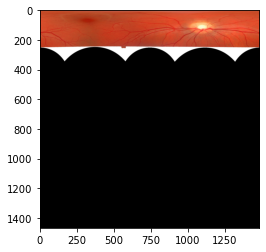

In [147]:
swapped = gore2.swap(fundus2, lammax, phimax)
plt.imshow(swapped)

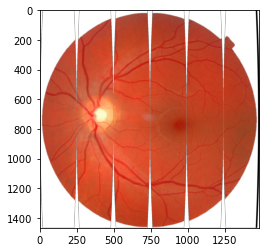

In [148]:
gored = gore2.make_equatorial(im = fundus2, num_gores = 6, phi_max = phimax, phi_min = -phimax, lam_max = lammax, lam_min = -lammax, projection = gore2.SINUSOIDAL)
plt.imshow(gored)

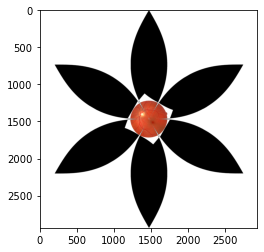

In [149]:
h,w = swapped.shape[:2]
swapped2 = gore2.cv2.resize(swapped, (w*2, h)) 
polar = gore2.make_polar(swapped2, num_gores = 6, projection = gore2.CASSINI)
plt.imshow(polar)

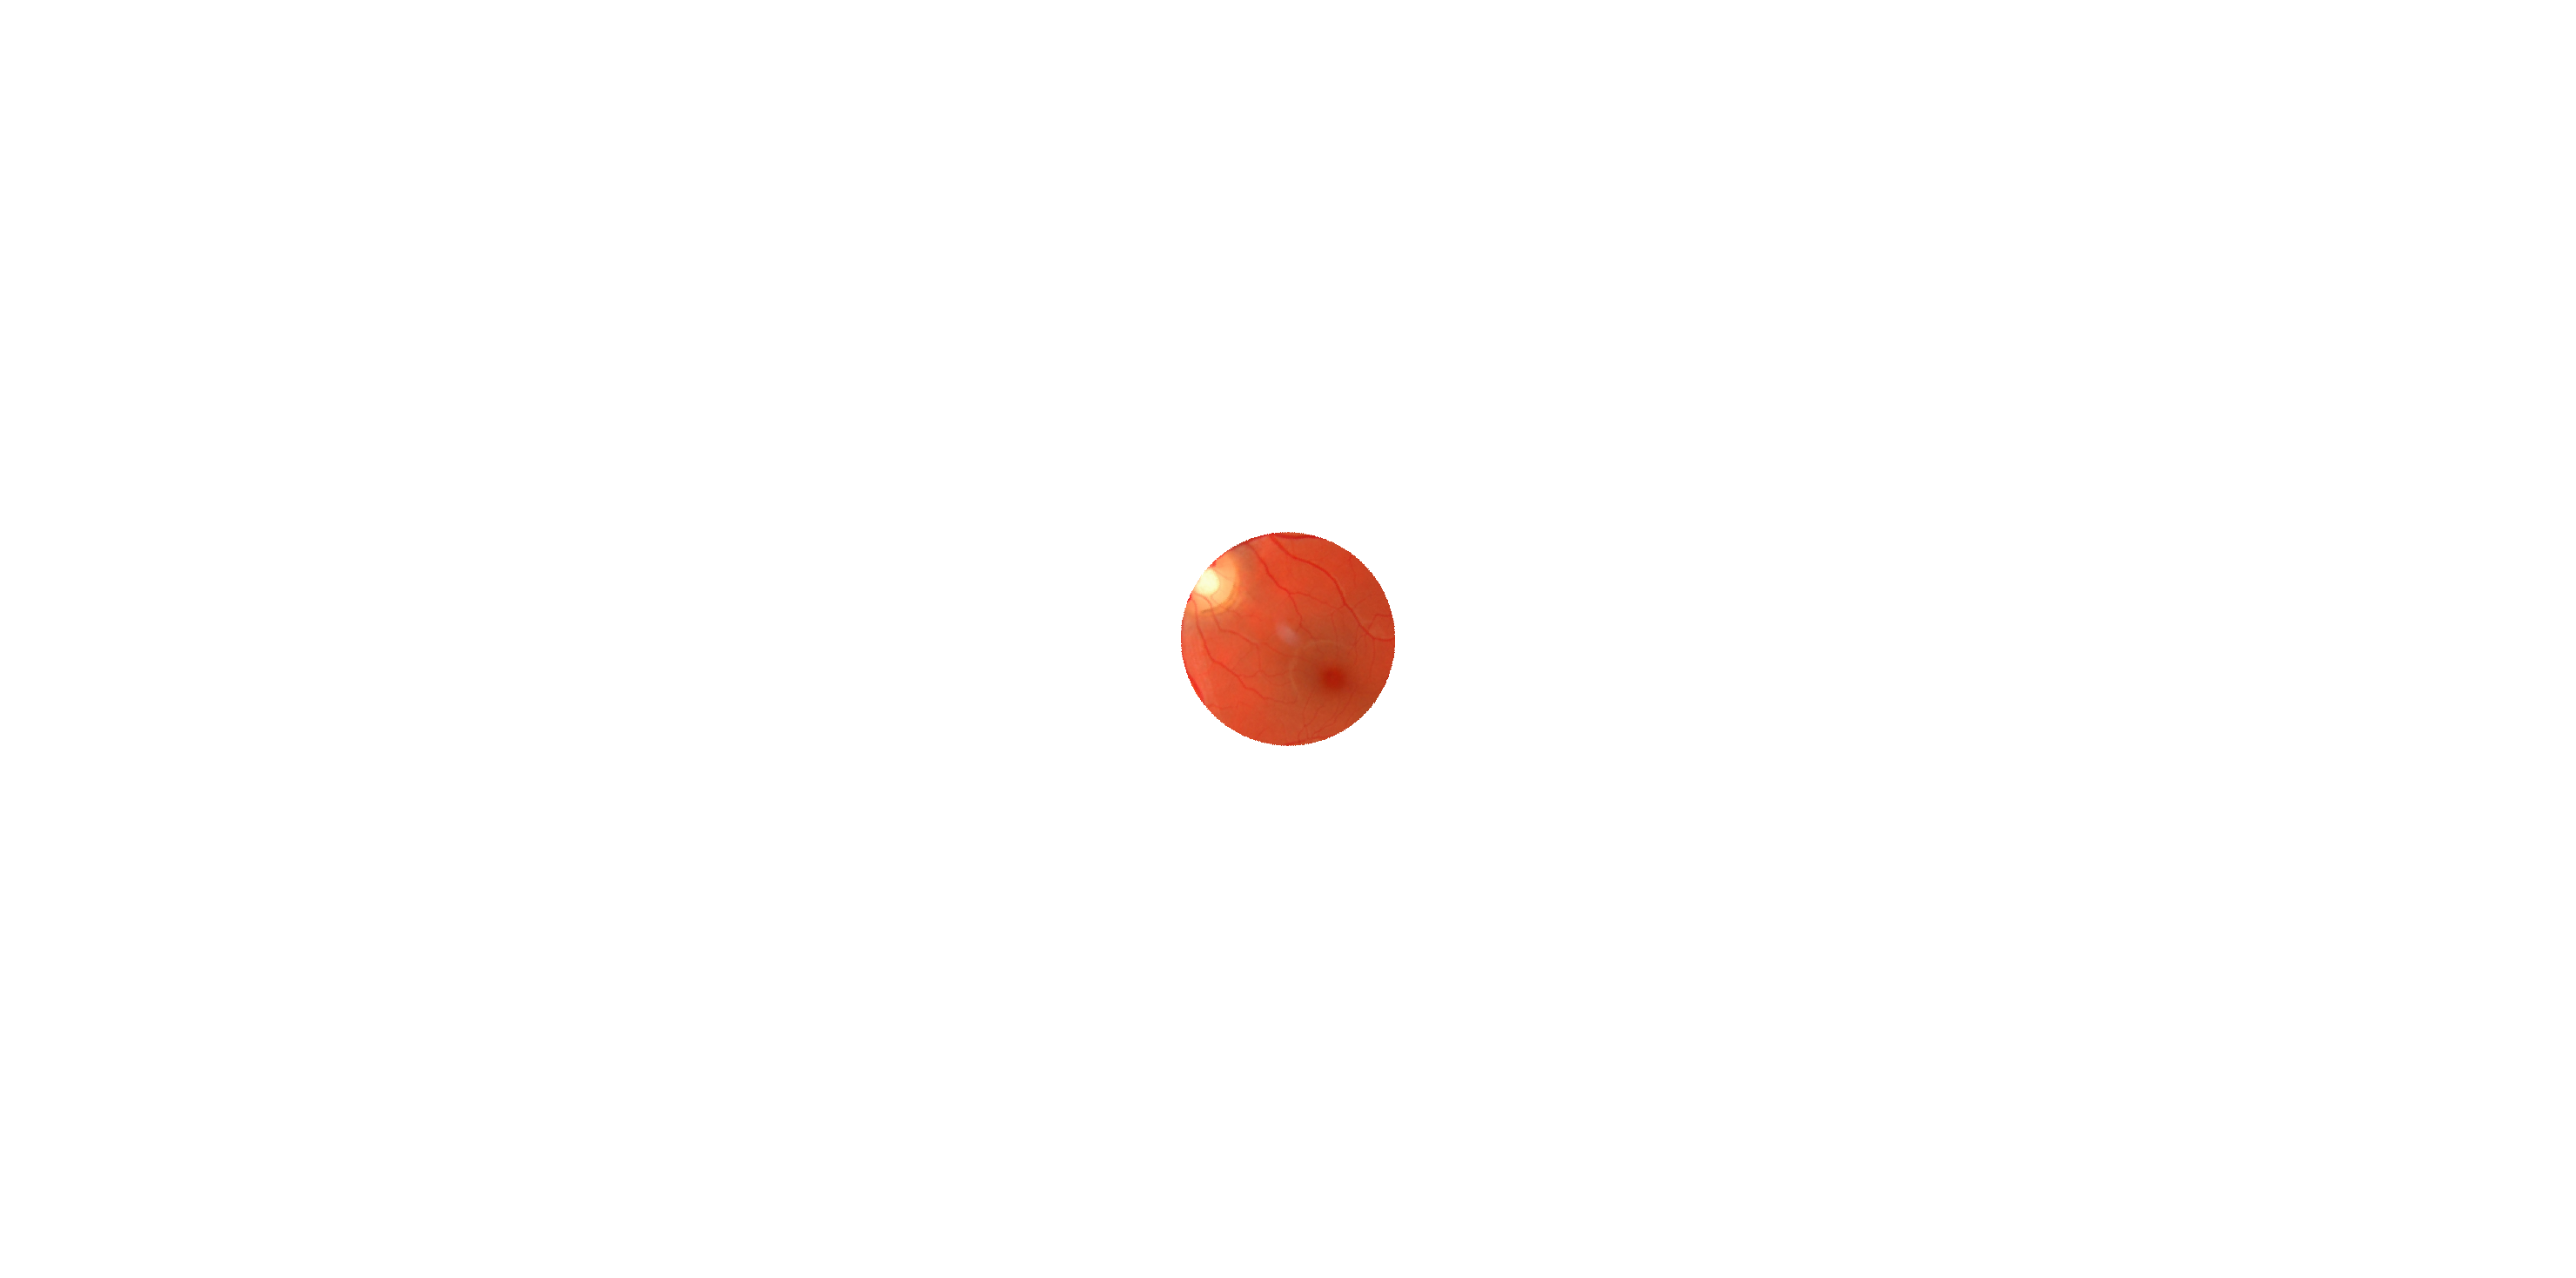

In [150]:
polecap = gore2.polecap(swapped2, num_gores = 6, phi_cap = gore2.deg2rad(15))
polecap

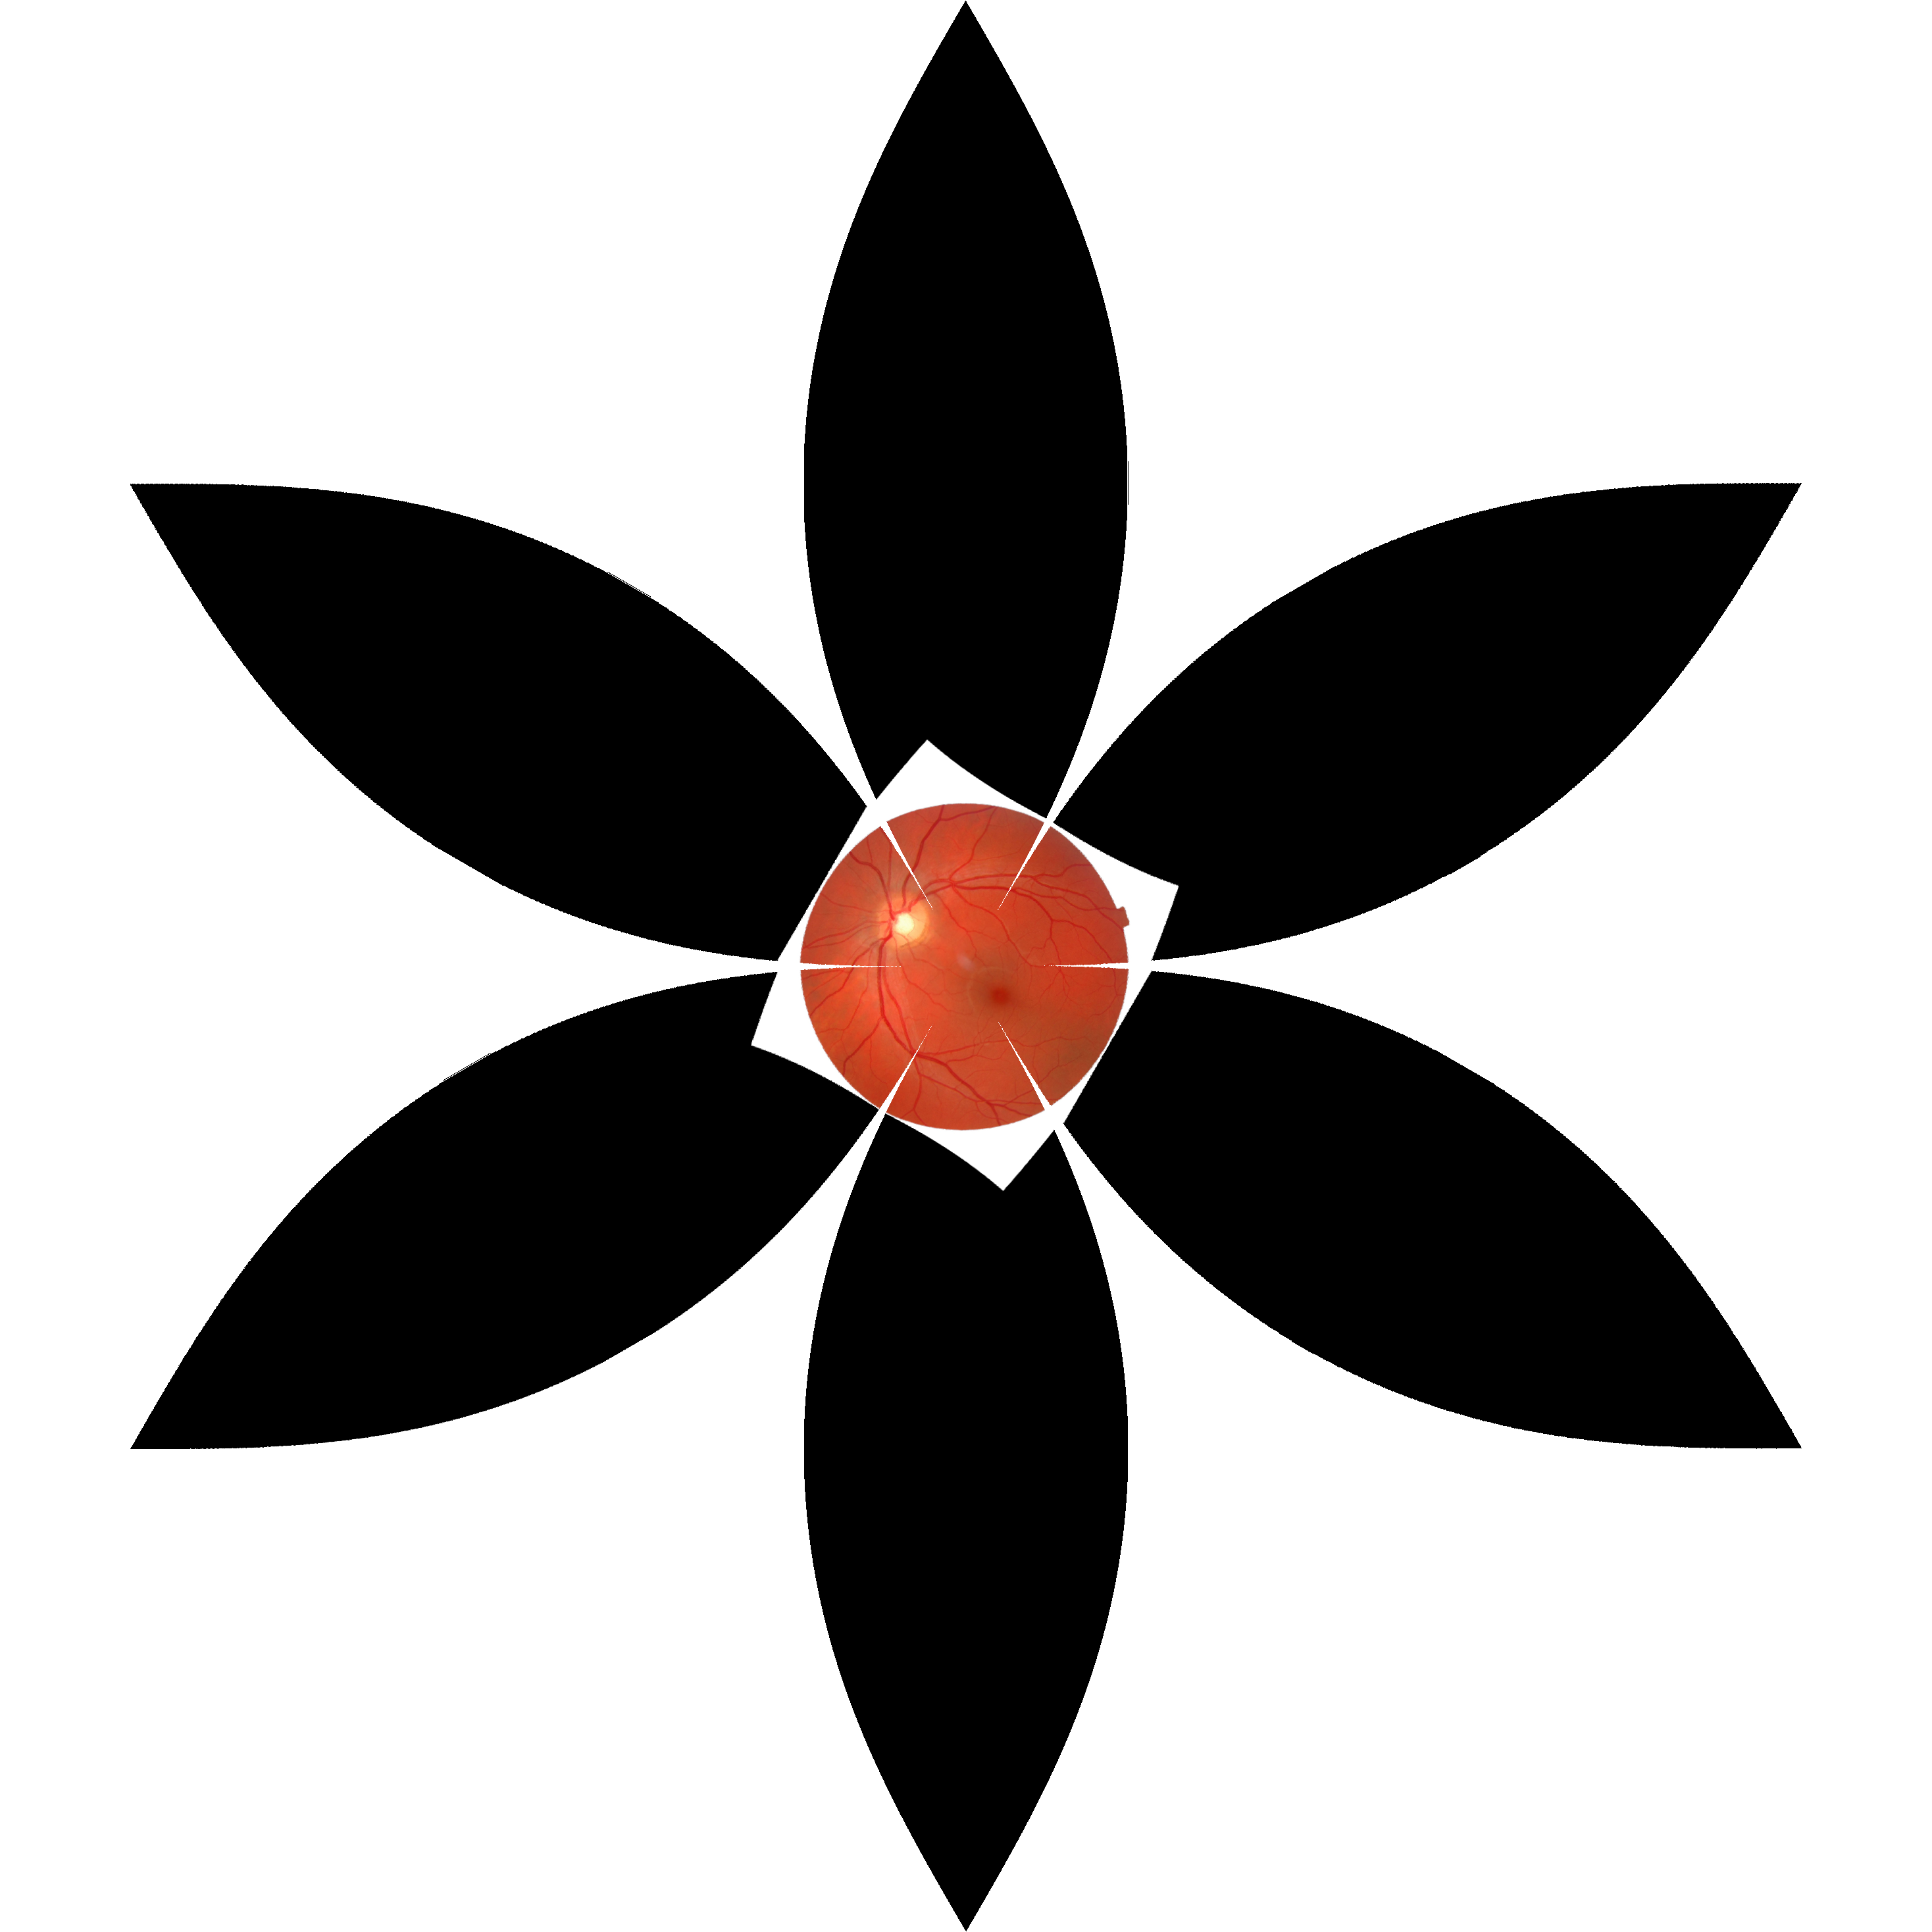

In [151]:
rotary = gore2.make_rotary(im, 
                focal_length = 24, 
                alpha_max = gore.deg2rad(32),
                num_gores = 6, 
                projection = gore2.CASSINI,
                phi_no_cut = gore2.deg2rad(12))
rotary